In [120]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = Path.cwd().parent
data_path = BASE_DIR / "data" / "atp_matches_2024.csv"

In [121]:
df = pd.read_csv(data_path)
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [122]:
print(df.shape)

(3076, 49)


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   draw_size           3076 non-null   int64  
 4   tourney_level       3076 non-null   object 
 5   tourney_date        3076 non-null   int64  
 6   match_num           3076 non-null   int64  
 7   winner_id           3076 non-null   int64  
 8   winner_seed         1294 non-null   float64
 9   winner_entry        477 non-null    object 
 10  winner_name         3076 non-null   object 
 11  winner_hand         3076 non-null   object 
 12  winner_ht           3057 non-null   float64
 13  winner_ioc          3076 non-null   object 
 14  winner_age          3075 non-null   float64
 15  loser_id            3076 non-null   int64  
 16  loser_

In [124]:
df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,3076.000000,3.076000e+03,3076.000000,3076.00000,1294.000000,3057.000000,3075.000000,3076.000000,757.000000,3026.000000,...,3016.000000,3016.000000,3016.000000,3015.000000,3016.000000,3016.000000,3059.000000,3059.000000,3036.000000,3036.000000
mean,62.909623,2.024057e+07,253.215865,156539.21684,8.112828,187.809617,26.393724,154957.033485,9.817701,186.658956,...,50.416446,34.012268,14.492042,12.362189,4.728117,8.300729,80.115724,1931.958483,109.737813,1197.309289
std,45.207737,3.056902e+02,100.295577,44881.60462,7.351917,6.455678,4.347541,44902.006128,8.182835,6.841295,...,18.937630,14.175500,6.945412,4.119986,3.297673,4.162465,137.350934,2162.141004,170.333317,1297.308468
min,2.000000,2.024010e+07,1.000000,100644.00000,1.000000,170.000000,17.000000,100644.000000,1.000000,71.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,32.000000,2.024030e+07,218.750000,111442.00000,3.000000,183.000000,23.100000,111153.000000,4.000000,183.000000,...,37.000000,24.000000,10.000000,9.000000,2.000000,5.000000,17.000000,688.000000,34.000000,555.000000
50%,32.000000,2.024053e+07,280.000000,133954.00000,6.000000,188.000000,26.100000,132686.000000,7.000000,185.000000,...,47.000000,32.000000,13.000000,11.000000,4.000000,8.000000,45.000000,1066.000000,64.000000,830.000000
75%,128.000000,2.024083e+07,297.000000,207213.00000,11.000000,193.000000,28.300000,206964.000000,14.000000,191.000000,...,61.000000,42.000000,18.000000,15.000000,7.000000,11.000000,85.000000,2270.000000,109.250000,1293.500000
max,128.000000,2.024122e+07,401.000000,212721.00000,32.000000,211.000000,44.600000,212970.000000,33.000000,211.000000,...,138.000000,99.000000,52.000000,29.000000,21.000000,27.000000,1643.000000,11830.000000,2102.000000,11245.000000


In [125]:
#Surface distribution
df['surface'].value_counts()

surface
Hard     1769
Clay      980
Grass     327
Name: count, dtype: int64

ATP season starts and ends with hard court tournaments. In between we have clay season, and then grass season which is the shortest one.

In [126]:
df[['winner_rank', 'loser_rank']].describe()

,winner_rank,loser_rank
count,3059.000000,3036.000000
mean,80.115724,109.737813
std,137.350934,170.333317
min,1.000000,1.000000
25%,17.000000,34.000000
50%,45.000000,64.000000
75%,85.000000,109.250000
max,1643.000000,2102.000000


Median for winners is 45 and for losers is 64. This confirms the expected pattern that winners tend to have better rankings, and losers to have worse.

In [127]:
df.notna().sum().sort_values().head(10)

winner_entry     477
loser_entry      718
loser_seed       757
winner_seed     1294
minutes         2838
w_SvGms         3015
l_SvGms         3015
w_1stWon        3016
w_1stIn         3016
w_ace           3016
dtype: int64

In [128]:
df.isna().mean().sort_values(ascending=False).head(10)

winner_entry    0.844928
loser_entry     0.766580
loser_seed      0.753901
winner_seed     0.579324
minutes         0.077373
w_SvGms         0.019831
l_SvGms         0.019831
w_bpFaced       0.019506
w_bpSaved       0.019506
w_2ndWon        0.019506
dtype: float64

In [129]:
print(df['winner_entry'].unique())
print(df['loser_entry'].unique())

[nan 'Q' 'WC' 'LL' 'Alt' 'SE' 'PR' 'UP' 'ITF' 'ALT' 'W']
[nan 'Q' 'WC' 'PR' 'LL' 'Alt' 'SE' 'ALT' 'ITF' 'UP' 'W']


winner_entry and loser_entry columns represent the way player entered the tournament (wild card, qualifiers, lucky loser). But since we miss 85% and 76% of the values respectively, we will drop these columns.

In [130]:
print('Maximum seed for winners: ', df['winner_seed'].max())
print('Maximum seed for losers: ', df['loser_seed'].max())
print('Minimum seed for winners: ', df['winner_seed'].min())
print('Minimum seed for losers: ', df['loser_seed'].min())

df['tourney_name'][df['loser_seed'] == 33]

Maximum seed for winners:  32.0
Maximum seed for losers:  33.0
Minimum seed for winners:  1.0
Minimum seed for losers:  1.0


758    Miami Masters
Name: tourney_name, dtype: object

Let's take a look at winner_seed and loser_seed columns. Usually grand slams have 32 as total number of seeds, while draw size is 128. Then ATP masters could have as little as 8 seeds for ATP 250 to 16 seeds for ATP 1000. As we can see largest seed for losers we have is 33 which is kinda confusing. The reason we have this outlier is because at ATP Miami 2024, Croatian player Borna Coric withdrew from the torunament after seeding process was done, and the player who entered had to get 33. seed. Since we miss 75% and 58% values we will drop these columns too.

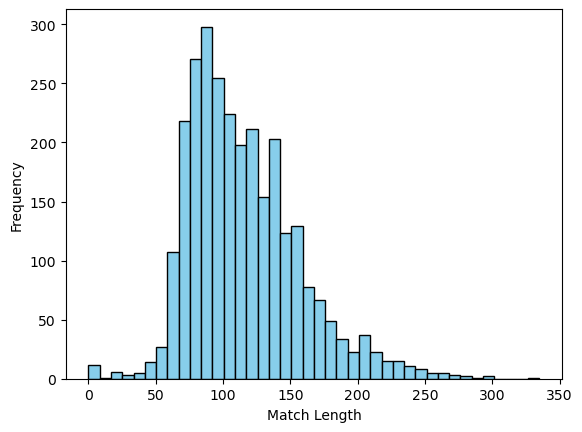

In [131]:
plt.hist(df['minutes'], bins = 40, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Match Length')
plt.ylabel('Frequency')
plt.show()

minutes column can be a useful predictor for us. We miss around 8% of the minutes data, but we will keep the column.

In [132]:
c_to_drop = [
    "winner_entry", "loser_entry", "winner_seed", "loser_seed",
    "match_num", "tourney_id", "winner_ht", "loser_ht",
    "winner_ioc", "loser_ioc", "winner_rank_points", "loser_rank_points",
    "score"
]

We defined list of the columns we will drop.
As we said before, we will drop first 4 columns because we have a lot of missing values.
match_num and tourney_id doesn't give any valuable information.
winner_ht and loser_ht could affect player serve quality but since we have other serve predictors, we will drop heights.
winner_ioc and loser_ioc are player's country codes. This columns could be valuable in some other cases, but for our problem it has no predictive value.
winner_rank_points and loser_rank_points are highly correlated with ranking, it will cause multicollinearity so we will drop it.
score is a textual field, and most importantly it could cause leakage, because using score to predict match outcome is cheating!

In [133]:
df_clean = df.drop(columns = c_to_drop)
df_clean.head()

,tourney_name,surface,draw_size,tourney_level,tourney_date,winner_id,winner_name,winner_hand,winner_age,loser_id,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank
0,Brisbane,Hard,32,A,20240101,105777,Grigor Dimitrov,R,32.6,208029,...,3.0,95.0,58.0,44.0,16.0,11.0,8.0,9.0,14.0,8.0
1,Brisbane,Hard,32,A,20240101,208029,Holger Rune,R,20.6,126128,...,5.0,66.0,35.0,31.0,10.0,11.0,5.0,7.0,8.0,39.0
2,Brisbane,Hard,32,A,20240101,105777,Grigor Dimitrov,R,32.6,111442,...,1.0,62.0,39.0,24.0,14.0,10.0,5.0,7.0,14.0,55.0
3,Brisbane,Hard,32,A,20240101,208029,Holger Rune,R,20.6,105902,...,2.0,77.0,51.0,31.0,16.0,10.0,3.0,5.0,8.0,116.0
4,Brisbane,Hard,32,A,20240101,126128,Roman Safiullin,R,26.4,208286,...,2.0,69.0,37.0,27.0,16.0,10.0,5.0,8.0,39.0,44.0


Now we have to transform our data format from match data into player vs player data. Right now we have 1 row per match. But what ML model expects one row as a one prediction instance. So we have to transform each match into 2 rows. Each match row will be transformed in 2 rows, one row for each player's perspective. We will add label column which will represent if row is from winner or loser perspective (1 for winner, 0 for loser).

In [134]:
def transform_matches(df):
    winner_df = pd.DataFrame({
        'player_id': df['winner_id'],
        'player_name': df['winner_name'],
        'player_hand': df['winner_hand'],
        'player_age': df['winner_age'],

        'opp_id': df['loser_id'],
        'opp_name': df['loser_name'],
        'opp_hand': df['loser_hand'],
        'opp_age': df['loser_age'],

        'player_ace': df['w_ace'],
        'player_df': df['w_df'],
        'player_svpt': df['w_svpt'],
        'player_1stIn': df['w_1stIn'],
        'player_1stWon': df['w_1stWon'],
        'player_2ndWon': df['w_2ndWon'],
        'player_SvGms': df['w_SvGms'],
        'player_bpSaved': df['w_bpSaved'],
        'player_bpFaced': df['w_bpFaced'],

        'opp_ace': df['l_ace'],
        'opp_df': df['l_df'],
        'opp_svpt': df['l_svpt'],
        'opp_1stIn': df['l_1stIn'],
        'opp_1stWon': df['l_1stWon'],
        'opp_2ndWon': df['l_2ndWon'],
        'opp_SvGms': df['l_SvGms'],
        'opp_bpSaved': df['l_bpSaved'],
        'opp_bpFaced': df['l_bpFaced'],

        'surface': df['surface'],
        'tourney_level': df['tourney_level'],
        'best_of': df['best_of'],
        'minutes': df['minutes'],

        'player_rank': df['winner_rank'],
        'opp_rank': df['loser_rank'],

        'label': 1
    })

    loser_df = pd.DataFrame({
        'player_id': df['loser_id'],
        'player_name': df['loser_name'],
        'player_hand': df['loser_hand'],
        'player_age': df['loser_age'],
        
        'opp_id': df['winner_id'],
        'opp_name': df['winner_name'],
        'opp_hand': df['winner_hand'],
        'opp_age': df['winner_age'],
        
        'player_ace': df['l_ace'],
        'player_df': df['l_df'],
        'player_svpt': df['l_svpt'],
        'player_1stIn': df['l_1stIn'],
        'player_1stWon': df['l_1stWon'],
        'player_2ndWon': df['l_2ndWon'],
        'player_SvGms': df['l_SvGms'],
        'player_bpSaved': df['l_bpSaved'],
        'player_bpFaced': df['l_bpFaced'],
        
        'opp_ace': df['w_ace'],
        'opp_df': df['w_df'],
        'opp_svpt': df['w_svpt'],
        'opp_1stIn': df['w_1stIn'],
        'opp_1stWon': df['w_1stWon'],
        'opp_2ndWon': df['w_2ndWon'],
        'opp_SvGms': df['w_SvGms'],
        'opp_bpSaved': df['w_bpSaved'],
        'opp_bpFaced': df['w_bpFaced'],
        
        'surface': df['surface'],
        'tourney_level': df['tourney_level'],
        'best_of': df['best_of'],
        'minutes': df['minutes'],
        
        'player_rank': df['loser_rank'],
        'opp_rank': df['winner_rank'],

        'label': 0
    })

    return pd.concat([winner_df, loser_df], ignore_index=True)

In [135]:
df_model = transform_matches(df_clean)
df_model.shape

(6152, 33)

df_model has 2x number of rows than df_clean.

In [136]:
df_model.isna().sum().sort_values(ascending=False)

minutes           476
opp_SvGms         122
player_SvGms      122
opp_bpSaved       120
player_ace        120
player_svpt       120
player_1stIn      120
player_2ndWon     120
player_bpSaved    120
player_bpFaced    120
opp_2ndWon        120
opp_1stWon        120
opp_1stIn         120
opp_ace           120
opp_svpt          120
player_df         120
player_1stWon     120
opp_df            120
opp_bpFaced       120
opp_rank           57
player_rank        57
opp_age             2
player_age          2
player_id           0
opp_name            0
opp_id              0
player_hand         0
opp_hand            0
player_name         0
best_of             0
tourney_level       0
surface             0
label               0
dtype: int64

As we saw earlier, we have 476 missing values for column minutes. It is an important predictor, and best option is to fill the missing values with median value, since median won't influence the distribution.

In [137]:
df_model['minutes'] = df_model['minutes'].fillna(df_model['minutes'].median())

Other columns have around 120 rows with missing data or less. That is just a tiny percentage (around 2%) and it is not critical, since our dataframe has 6152 rows. We will drop the rows with missing data.

In [138]:
cols = [
    "player_SvGms", "opp_SvGms", "player_ace", "player_df", "player_svpt",
    "player_1stIn", "player_1stWon", "player_2ndWon", "player_bpSaved", "player_bpFaced",
    "opp_ace", "opp_df", "opp_svpt", "opp_1stIn", "opp_1stWon", "opp_2ndWon",
    "opp_bpSaved", "opp_bpFaced", "opp_rank", "player_rank"
]

df_model = df_model.dropna(subset = cols)

In [139]:
df_model.isna().sum().sort_values(ascending=False)

player_id         0
player_name       0
player_hand       0
player_age        0
opp_id            0
opp_name          0
opp_hand          0
opp_age           0
player_ace        0
player_df         0
player_svpt       0
player_1stIn      0
player_1stWon     0
player_2ndWon     0
player_SvGms      0
player_bpSaved    0
player_bpFaced    0
opp_ace           0
opp_df            0
opp_svpt          0
opp_1stIn         0
opp_1stWon        0
opp_2ndWon        0
opp_SvGms         0
opp_bpSaved       0
opp_bpFaced       0
surface           0
tourney_level     0
best_of           0
minutes           0
player_rank       0
opp_rank          0
label             0
dtype: int64

In [140]:
df_model.shape

(5942, 33)

As we can see, we don't have NA values anymore.

Let's see which new features can we engineer to imporve performance of the model.